In [44]:
import numpy as np
import pandas as pd

In [45]:
ratings=pd.read_csv('/content/drive/My Drive/Dataset/Ratings .csv')
movies=pd.read_csv('/content/drive/My Drive/Dataset/movies.csv')
userdata=pd.read_csv('/content/drive/My Drive/Dataset/user_data.csv')

In [ ]:
movies=pd.read_csv('/content/drive/My Drive/Dataset/movies.csv')
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings=pd.read_csv('/content/drive/My Drive/Dataset/Ratings .csv')
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
userdata=pd.read_csv('/content/drive/My Drive/Dataset/user_data.csv')
userdata

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [ ]:
df=ratings.merge(userdata, on='UserID',how='left').merge(movies, on='MovieID',how='left')
df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
df.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres'],
      dtype='object')

In [ ]:
df.dtypes

UserID         int64
MovieID        int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
Title         object
Genres        object
dtype: object

## **What do you mean by data?**
Here ,we have 3 different datasets are:
*   ***Movie dataset***:It contains 3 columns: MovieID::Title::Genres
*   *MovieId*:MovieIDs range between 1 and 3952

*   *Title*:Titles are identical to titles provided by the IMDB (including year of release)
*   *Genres*:Movie categories are

  * Action, Adventure, Animation, Children's, Comedy, Crime,Documentary , Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western


*   ***Rating dataset***:It contains 4 columns: UserID::MovieID::Rating::Timestamp
*   *UserID*:UserIDs range between 1 and 6040 
*   *MovieId*:MovieIDs range between 1 and 3952
*   *Ratings*:Ratings are made on a 5-star scale (whole-star ratings only)
*  *Timestamp*:Timestamp is the time mentioned in the second when the rating war provided.

*   **User dataset**:It contains 5 columns: UserID::Gender::Age::Occupation::Zip-code
*   *UserID*:UserIDs range between 1 and 6040 
*   *Gender*:Gender is denoted by a "M" for male and "F" for female
*   *Age*:Age is chosen from the following ranges:

	*  1:  "Under 18", 18:  "18-24", 25:  "25-34", 35:  "35-44", 45:  "45-49", 50:  "50-55", 56:  "56+"

*   *Occupation*:Occupation is chosen from 0 to 20:
     *  0:  "other" or not specified,  1:  "academic/educator",  2:  "artist",  3:  "clerical/admin",  4:  "college/grad student",  5:  "customer service",  6:  "doctor/health care",  7:  "executive/managerial",  8:  "farmer",  9:  "homemaker", 10:  "K-12 student", 11:  "lawyer", 12:  "programmer", 13:  "retired", 14:  "sales/marketing", 15:  "scientist", 16:  "self-employed", 17:  "technician/engineer", 18:  "tradesman/craftsman", 19:  "unemployed", 20:  "writer"


*   *Zip-code*: Pincode of user













### **Perform Exploratory Data Analysis , Data Cleaning & Feature Engg on the Training dataset**
Idenitfy & Remove the field that is providing only unique information about records 

In [ ]:
for i in df.columns:
  print('{} is unique: {}'.format(i, df[i].is_unique))

UserID is unique: False
MovieID is unique: False
Rating is unique: False
Timestamp is unique: False
Gender is unique: False
Age is unique: False
Occupation is unique: False
Zip-code is unique: False
Title is unique: False
Genres is unique: False


So,There is no field that is providing unique informations about the records.

**Identifying continous and categorial columns**

In [48]:
#continous columns
continous_col = df._get_numeric_data().columns
con_cols = []
for i in continous_col:
  if(len(df[i].unique())>df.shape[0]/25):
     con_cols.append(i)
print ('Continous column:',con_cols)  

Continous column: ['Timestamp']


In [49]:
#categorial column
cate_col=list(set(df.columns)-set(con_cols))
cat_col=[]
for i in cate_col:
  if(len(df[i].unique())<df.shape[0]/25):  
    cat_col.append(i)
print ('Categorial columns:',cat_col)

Categorial columns: ['Zip-code', 'Age', 'MovieID', 'UserID', 'Genres', 'Gender', 'Title', 'Occupation', 'Rating']


In [ ]:
for i in con_cols:
  print(i,':',(len(df[i].unique())))

Timestamp : 458455


In [ ]:
#categorial
for j in list(set(df.columns) - set(con_cols)):
  print(j,':',(len(df[j].unique())))

Zip-code : 3439
Age : 7
MovieID : 3706
UserID : 6040
Genres : 301
Gender : 2
Title : 3706
Occupation : 21
Rating : 5


**Uni-variate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88967d5470>,
      dtype=object)

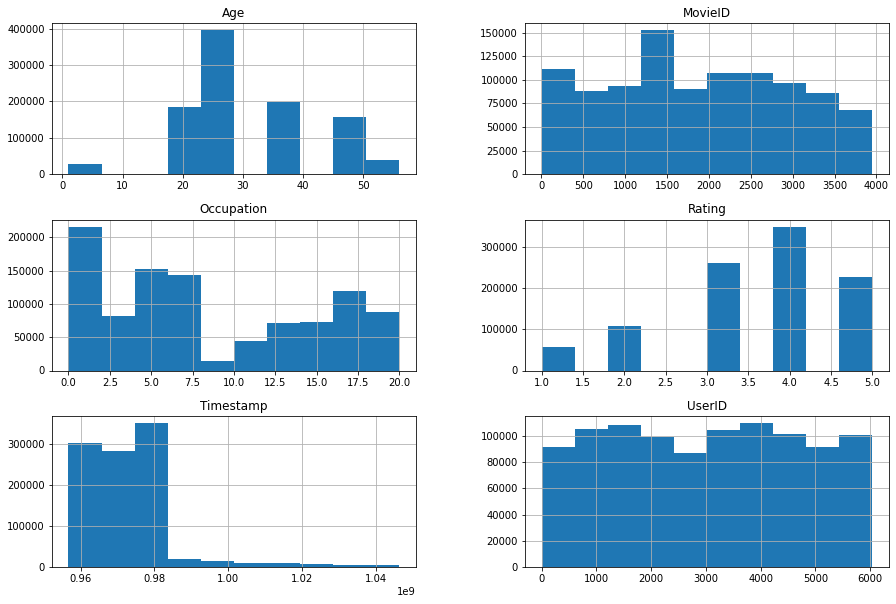

In [ ]:
df.hist(figsize=[15,10])

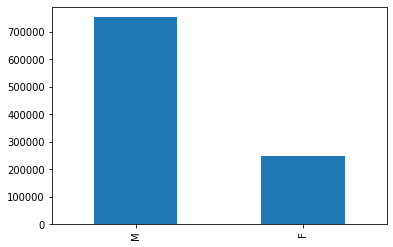

In [ ]:
df['Gender'].value_counts().plot.bar()

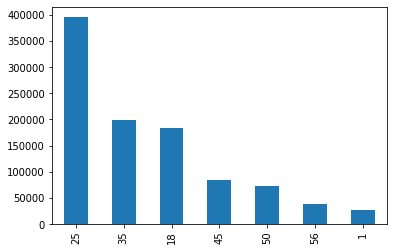

In [ ]:
df['Age'].value_counts().plot.bar()

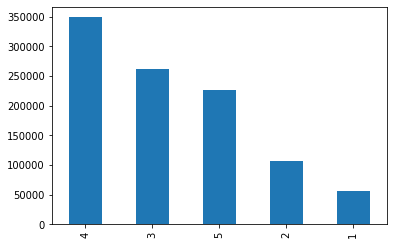

In [ ]:
df['Rating'].value_counts().plot.bar()

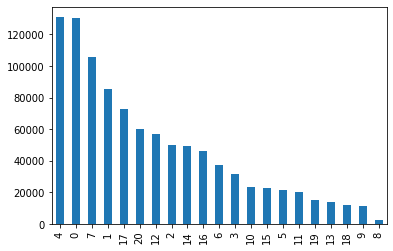

In [ ]:
df['Occupation'].value_counts().plot.bar()

Inferences from the above plots are:

*   The *Age* graph shows that the people who belong to age 25 are most watched the movies.And who belong to age 1 and 56 are least watched movies.
*   The *MovieID* graph shows that the movieid between the range of 1250-1600 are watched more movies.And movieid between 3500-4000 are watched less movies.

*   The *Occupation* graph shows that the people with occupation 0 and 4  are most watched movies.And people with Occupation 8 are least watched the movies.
*  The *Rating* graph shows that the most of the people rated the movies with rating 4 .

*   The *UserID* graph shows that the userid between the range of 1500-2000 are watched more movies.And userid between 2500-3000 are watched less movies.
*   The *Gender* graph shows that the more number of males watched movies than females.


**Bi-variate Analysis**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


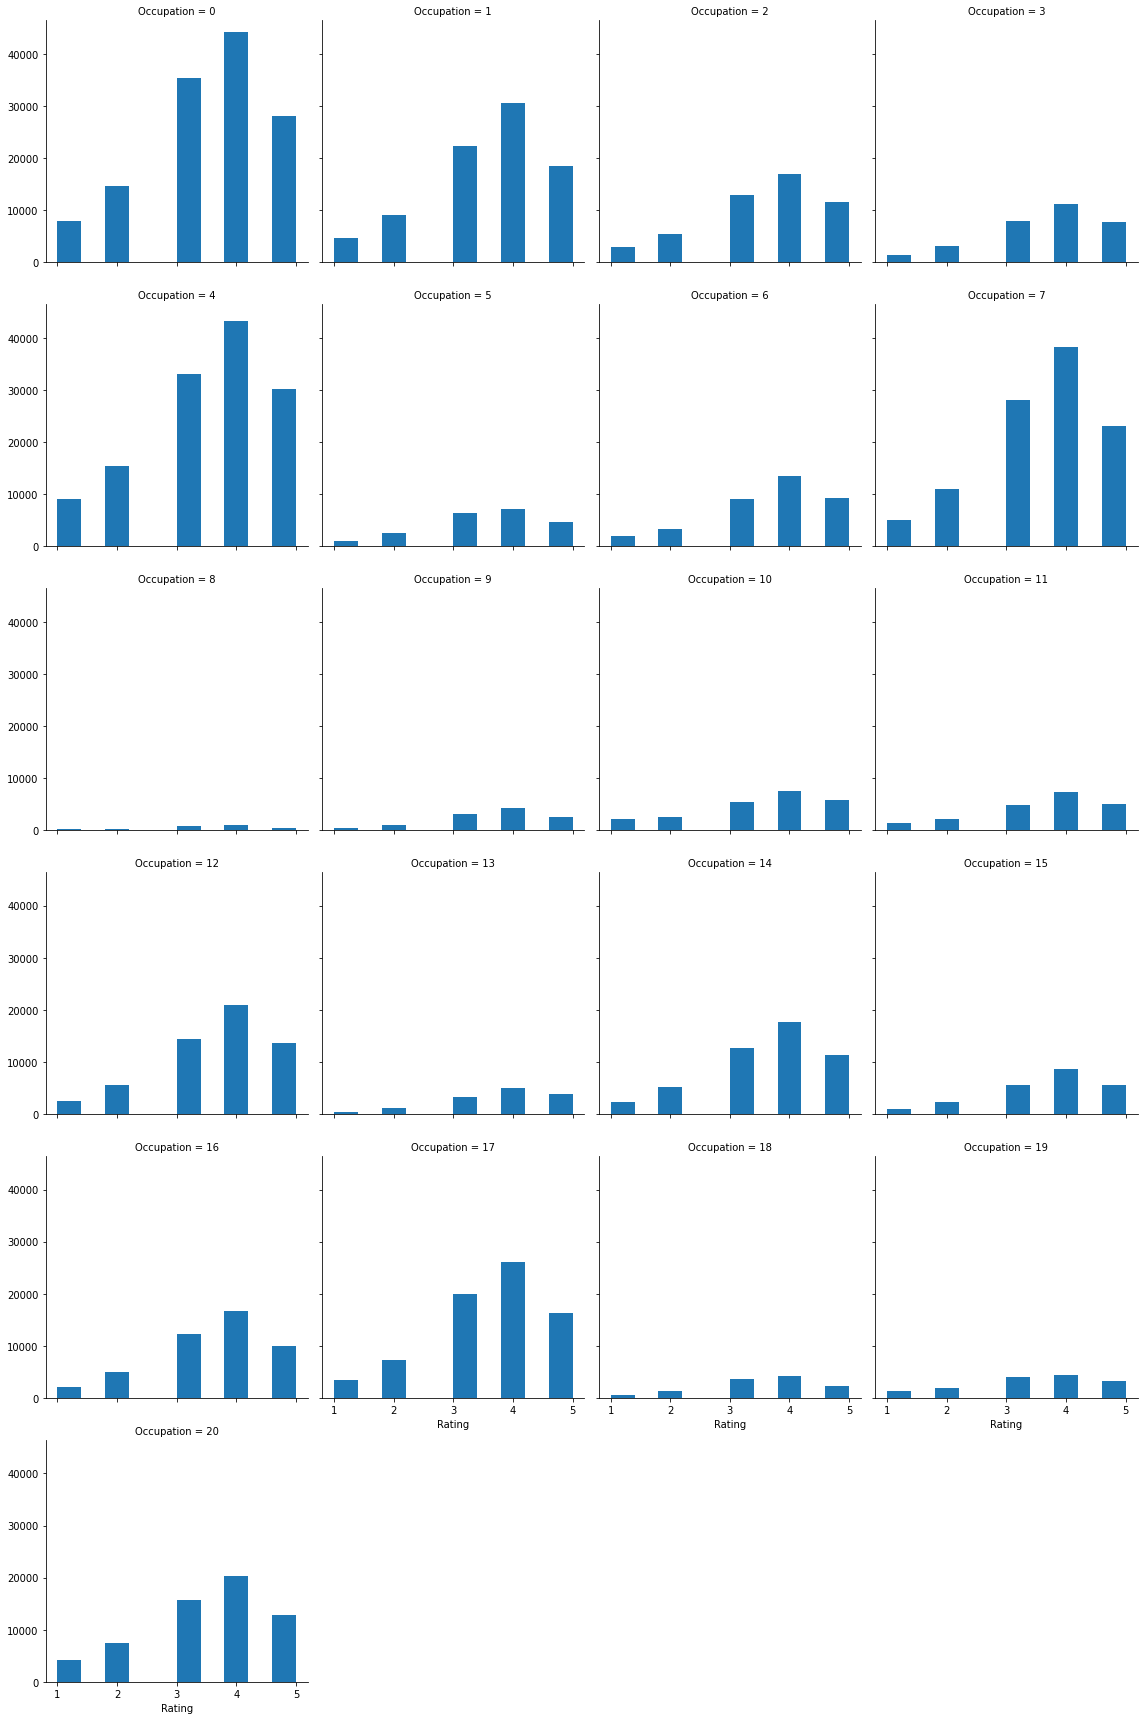

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fn = sns.FacetGrid(df,col='Occupation',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Rating')

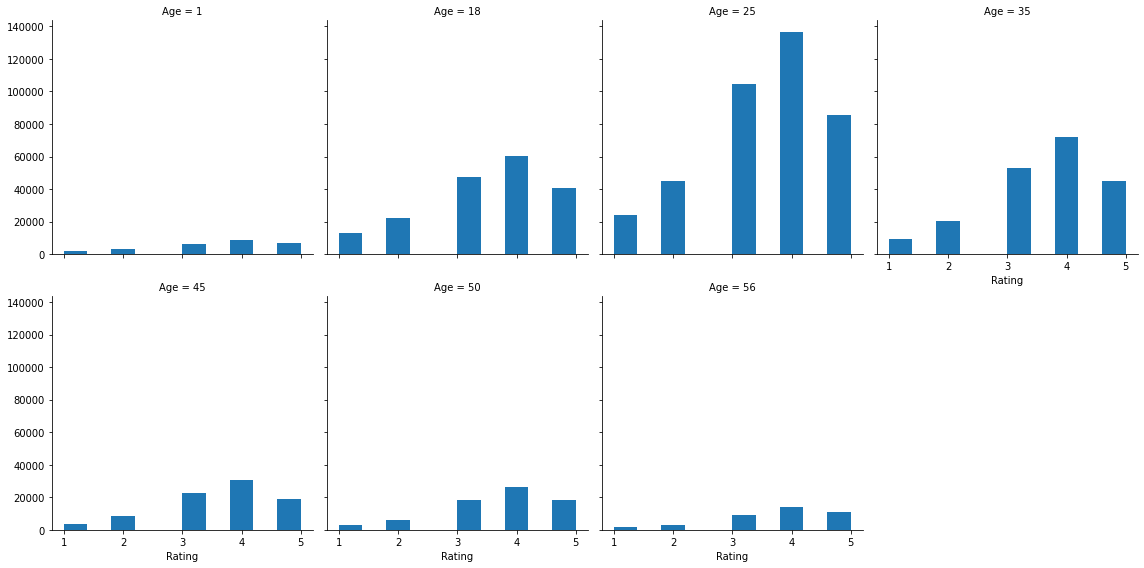

In [ ]:
fn = sns.FacetGrid(df,col='Age',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Rating')

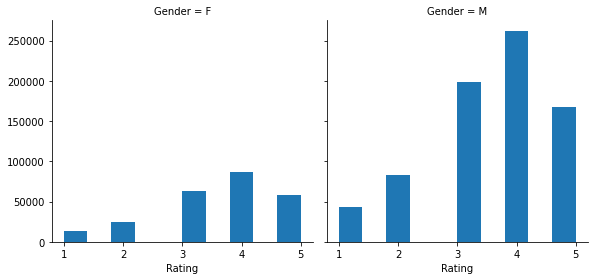

In [ ]:
fn = sns.FacetGrid(df,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Rating')

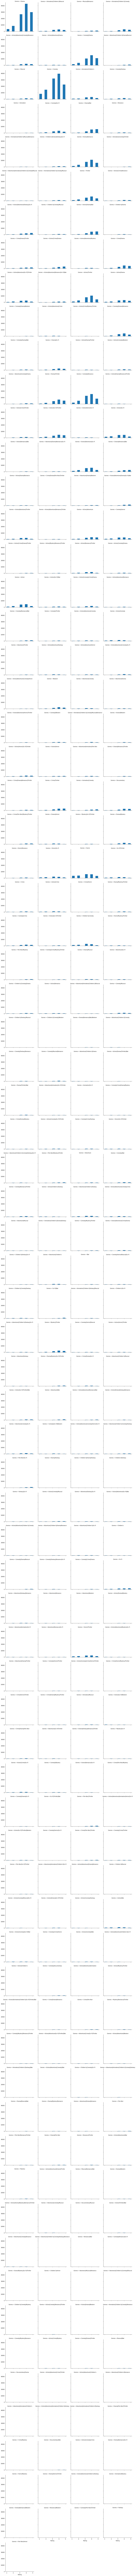

In [ ]:
fn = sns.FacetGrid(df,col='Genres',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Rating')

Inferences from the above plots are:


*   The *Occupation* graph shows that the people with occupation 0, 4 and 7 *i.e 'other or nor specified' , 'college/grad student' , and , 'executive/managerial'* are most watched movies and rated them also .And people with Occupation 8, 18 and 9  *i.e 'farmer' , 'Tradesman' , and , 'homemaker'* are least rated/watched the movies.
*   The *Age* graph shows that the people who belong to 25 age  *i.e '25-34'*  are most watched the movies and rated them.And who belong to age 1 and 56  *i.e 'under 18' and '56+'* are least watched and rated movies.

*   The *Gender* graph shows that the more number of males watched movies than females.And most of the males rated the movies with rating 4.
*   The *Genres* graph shows that the movies with genre *Drama and Comedy* are the most watched movies by the peoples. And with genre       *Documentary* are the least watched/rated movies .





In [ ]:
#most rated movies
most_rated=df['Rating']>4
df[most_rated][['Title','Genres','Rating']]

,Title,Genres,Rating
0,One Flew Over the Cuckoo's Nest (1975),Drama,5
4,"Bug's Life, A (1998)",Animation|Children's|Comedy,5
6,Ben-Hur (1959),Action|Adventure|Drama,5
7,"Christmas Story, A (1983)",Comedy|Drama,5
10,Beauty and the Beast (1991),Animation|Children's|Musical,5
...,...,...,...
1000194,Sleeper (1973),Comedy|Sci-Fi,5
1000199,"Last Temptation of Christ, The (1988)",Drama,5
1000200,Saving Private Ryan (1998),Action|Drama|War,5
1000205,"Crying Game, The (1992)",Drama|Romance|War,5


In [ ]:
#least rated movies
least_rated=df['Rating']<4
df[least_rated][['Title','Genres','Rating']]

,Title,Genres,Rating
1,James and the Giant Peach (1996),Animation|Children's|Musical,3
2,My Fair Lady (1964),Musical|Romance,3
5,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,3
16,Tarzan (1999),Animation|Children's,3
20,Pleasantville (1998),Comedy,3
...,...,...,...
1000195,"Fish Called Wanda, A (1988)",Comedy,2
1000197,Dangerous Liaisons (1988),Drama|Romance,3
1000198,Dune (1984),Fantasy|Sci-Fi,3
1000203,Platoon (1986),Drama|War,3


In [ ]:
#calculate mean rating of all movies
Mean_Rating=df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()
print(Mean_Rating)

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64


In [ ]:
#calculate count rating of all movies
Num_Rating=df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()
print(Num_Rating)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64


In [ ]:
ratings=pd.DataFrame(df.groupby('Title')['Rating'].mean())
ratings.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [ ]:
ratings['Number of Ratings']=pd.DataFrame(df.groupby('Title')['Rating'].count())
ratings.head()

,Rating,Number of Ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


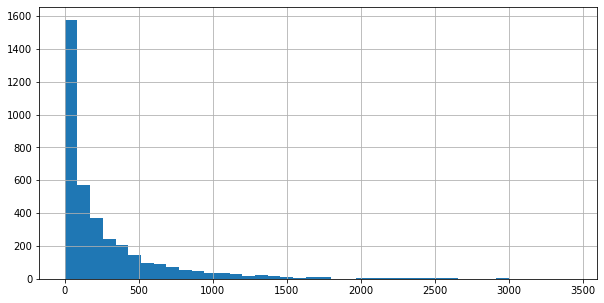

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ratings['Number of Ratings'].hist(bins=40)


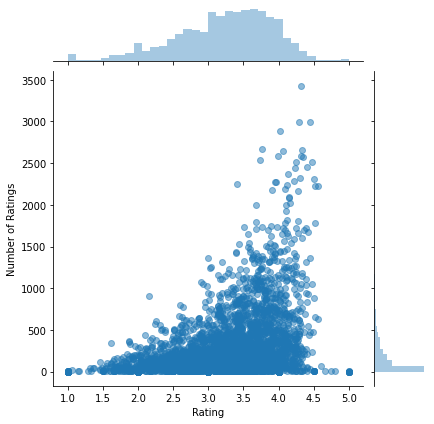

In [ ]:
sns.jointplot(x='Rating',y='Number of Ratings',data=ratings,alpha=0.5)

Inferences from the above plot are:

*   The above graph shows the relationship between the ratings and number of rating.
*   Where the points are dense, that is the most  number of rating are given .



In [ ]:
#split genres
indx=[]
value=[]

a=df['Genres'].str.split('|')
for i in range(0,len(a)):
   #print(len(df['Genres']))
   aa=a[i]
   for j in range(0,len(aa)):
     indx.append(i)
     value.append(aa[j])

new_df = df.loc[indx].copy()
new_df['Genres'] = value
new_df.head(10)    

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Children's
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Children's
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Comedy


Text(0, 0.5, 'Count')

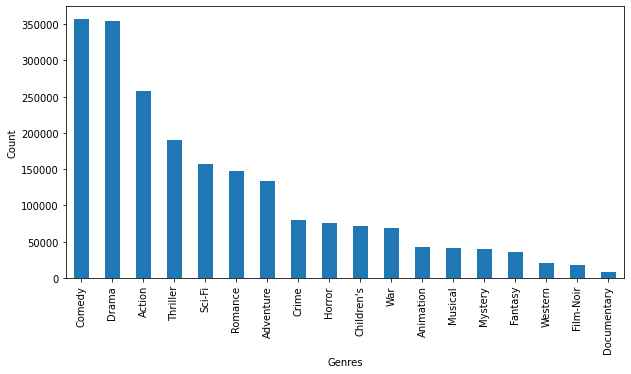

In [ ]:
# Most populated movie genres
plt.figure(figsize=(10,5))
a=new_df['Genres'].value_counts().plot.bar()
a.set_xlabel('Genres')
a.set_ylabel('Count')

Inferences from the above plot are:


*   Most populated genre are Comedy and Drama i.e people usually like movies with genre like Comedy and Drama.
*   Least populated genre is Documentary.

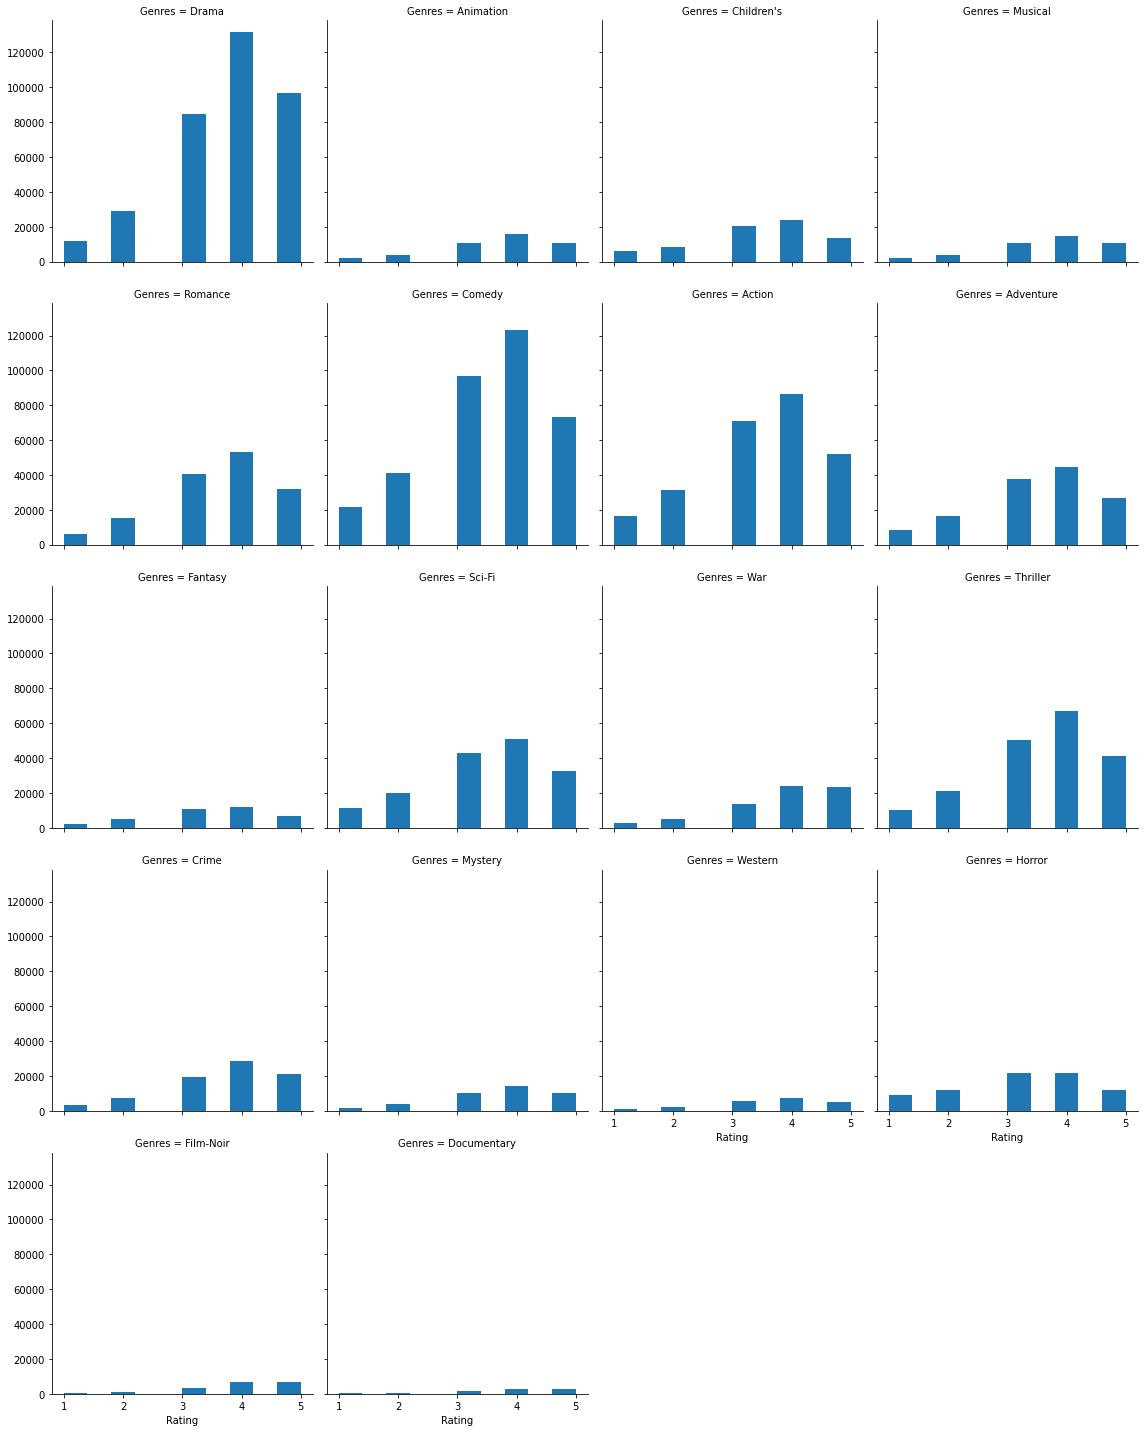

In [ ]:
#using facetgrid to represent each genre with rating
fn = sns.FacetGrid(new_df,col='Genres',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Rating')

Inferences from the above plots are:


*   Most the people watched movies with genres are *Drama and Comedy*. 
*   Movies with genres *Action , Adventure , Thriller and Sci-Fi* are also quite popular.

*   Least watched movies with genre are *Flim-Noir and Documentary*.


In [ ]:
# count genres rating of all movies
new_df.groupby('Genres')['Rating'].count().sort_values(ascending=False)

Genres
Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: Rating, dtype: int64

In [ ]:
# mean rating of all genres
new_df.groupby('Genres')['Rating'].mean()

Genres
Action         3.491185
Adventure      3.477257
Animation      3.684868
Children's     3.422035
Comedy         3.522099
Crime          3.708679
Documentary    3.933123
Drama          3.766332
Fantasy        3.447371
Film-Noir      4.075188
Horror         3.215013
Musical        3.665519
Mystery        3.668102
Romance        3.607465
Sci-Fi         3.466521
Thriller       3.570466
War            3.893327
Western        3.637770
Name: Rating, dtype: float64

**Identify missing values**

In [ ]:
print('Number of missing values\n')
print(df.isnull().sum())

Number of missing values

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64


So,here no missing values in the dataset

**Outlier handling**

In [ ]:
for i in con_cols:
  print(i,'  : ',(df[i].skew()))

Timestamp   :  2.7656911632559553


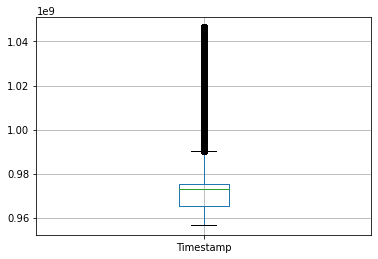

In [ ]:
#Use boxplot to represent oulier
df.boxplot(column='Timestamp')
#some outliers are present

In [ ]:
#handling outliers
for i in con_cols:
  lower = df[i].quantile(0.05)
  upper = df[i].quantile(0.95)
  df[i] = np.where(df[i] < lower,lower,df[i])
  df[i] = np.where(df[i] > upper, upper,df[i])
  print(' After Outlier handling ', i, ' : ',df[i].skew())

 After Outlier handling  Timestamp  :  0.716591945994963


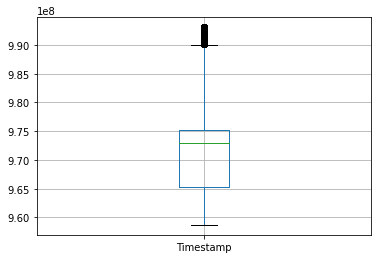

In [ ]:
df.boxplot(column='Timestamp')

**Features selection using correlation**

In [75]:
#encoding the categorial columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
en=new_df.copy()
for i in cat_col:
  en['en_'+str(i)] = le.fit_transform(en[i])
en=en.drop(columns=cat_col)
en.head()


,Timestamp,en_Zip-code,en_Age,en_MovieID,en_UserID,en_Genres,en_Gender,en_Title,en_Occupation,en_Rating
0,978300760,1429,0,1104,0,7,0,2452,10,4
1,978302109,1429,0,639,0,2,0,1739,10,2
1,978302109,1429,0,639,0,3,0,1739,10,2
1,978302109,1429,0,639,0,11,0,1739,10,2
2,978301968,1429,0,853,0,11,0,2289,10,2


In [76]:
#shape of categorial encoding
print("The shape after the enoding is : ",en.shape)

#shape of the dataframe is shape because using of new_df which is usd to stored the separated genres
#That's why number of rows increases  

The shape after the enoding is :  (2101815, 10)


In [77]:
#correlation 
corr = en.corr()
corr.head(10)

,Timestamp,en_Zip-code,en_Age,en_MovieID,en_UserID,en_Genres,en_Gender,en_Title,en_Occupation,en_Rating
Timestamp,1.000000,0.021245,-0.056657,0.039849,-0.505455,-0.000759,-0.006896,-0.002746,0.013276,-0.028001
en_Zip-code,0.021245,1.000000,0.006173,0.001342,-0.044859,-0.002062,-0.014049,0.002652,0.034263,0.001094
en_Age,-0.056657,0.006173,1.000000,0.028701,0.031913,0.038592,-0.004602,-0.016610,0.086032,0.058712
en_MovieID,0.039849,0.001342,0.028701,1.000000,-0.015524,-0.027691,0.020488,0.009239,0.007804,-0.071240
en_UserID,-0.505455,-0.044859,0.031913,-0.015524,1.000000,0.004009,-0.035940,-0.001299,-0.023147,0.011808
en_Genres,-0.000759,-0.002062,0.038592,-0.027691,0.004009,1.000000,-0.006967,-0.008700,0.002289,0.028662
en_Gender,-0.006896,-0.014049,-0.004602,0.020488,-0.035940,-0.006967,1.000000,0.003726,0.115280,-0.019593
en_Title,-0.002746,0.002652,-0.016610,0.009239,-0.001299,-0.008700,0.003726,1.000000,0.000472,0.011743
en_Occupation,0.013276,0.034263,0.086032,0.007804,-0.023147,0.002289,0.115280,0.000472,1.000000,0.008874
en_Rating,-0.028001,0.001094,0.058712,-0.071240,0.011808,0.028662,-0.019593,0.011743,0.008874,1.000000


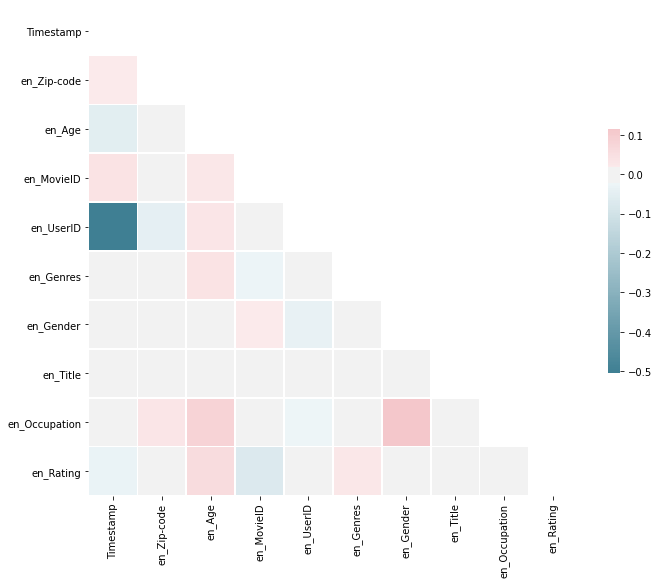

In [78]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Inferences from the above heatmap are:

*  Heatmap shows the strong positive and strong negative correlation.
*   Here, the  light pink colour shows the strong postive and dark blue shows the strong negative correlation.

*   Age, Gender ,Occupation ,Genres show strong positive correlation and userId shows negative correlation.
*   From the recommendation system point of view, in *content based filtering* we need userid and movie id and in *collabrative filtering* assumptions are made on the basis of previous like or similarity in movies.According to this, we don't need feature *Timestamp* and *Zip-code*.

